## TMA4212, Proj 2 FEM 
### Emma Brændhagen, Eivor Øsebak-Loe, Elsa Dalbye

In [1]:
%matplotlib inline
import numpy as np
from scipy import integrate
from scipy import interpolate 
import random
import pandas as pd
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

In [2]:
fk = np.array([1/2,1/2])   # f=1

In [3]:
#from espen
def loc2glob(k,alpha):
    return k+alpha          # Numbering k from 0

In [4]:
#FEM for task a, with random nodes 
def FEM(f, a, b, c, n):
    
    #chatgpt 
    A = np.zeros((n,n))
    rhs = np.zeros(n)
    random_nodes = np.random.rand(n-2)
    nodes = np.concatenate(([0], random_nodes, [1]))
    Xk = np.sort(nodes) #for task a 
    #Xk = np.linspace(0,1,n) #for task b
                    
    
    H = Xk[1:]-Xk[:-1] # Element sizes from espen 
    phi = np.array([0,1])
    
    Ak = np.array([[a,-a],[-a,a]])
    Bk = np.array([[0, b/2],[-b/2, 0]])
    Ck = np.array([[c/3,c/6], [c/6, c/3]])
    
    #espen with modifications. 
    for k in range(0,n-1):
        x_max = Xk[k+1]
        x_min = Xk[k]
        x_interval = np.linspace(x_min, x_max, 10)       #x-values in the interval to do the integration
        for alpha in range(2):
            i = loc2glob(k,alpha)
            for beta in range(2):
                j = loc2glob(k,beta)
                A[i,j] += (Ak[alpha,beta]/H[k] + Bk[alpha,beta] + Ck[alpha,beta]*H[k])
            
           
        f_vals = f(x_interval, alpha, b, c)
        phi0 = integrate.trapezoid(f_vals * (x_max - x_interval)/H[k], x_interval) # approx of integral of f(x)*phi0
        phi1 = integrate.trapezoid(f_vals * (x_interval - x_min)/H[k], x_interval)
        rhs[k] += phi0
        rhs[k+1] += phi1            
            
    #boudary (espen ):         
    A[0,:] = 0
    A[0,0] = 1
    A[-1,:] = 0
    A[-1,-1] = 1
    rhs[0] = 0
    rhs[-1] = 0
    
    
    U = np.linalg.solve(A, rhs)
    A = np.around(A, decimals= 2, out = None )  
    rhs = np.around(rhs, decimals= 2, out = None )
    #print(A)

    return U, A, Xk, rhs

In [5]:
#FEM for task b, with equidistant nodes 
def FEM_b(f, a, b, c, n):
    
    #chatgpt 
    A = np.zeros((n,n))
    rhs = np.zeros(n)
    '''random_nodes = np.random.rand(n-2)
    nodes = np.concatenate(([0], random_nodes, [1]))
    Xk = np.sort(nodes) #for task a '''
    Xk = np.linspace(0,1,n) #for task b
                    
    
    H = Xk[1:]-Xk[:-1] # Element sizes from espen 
    phi = np.array([0,1])
    
    Ak = np.array([[a,-a],[-a,a]])
    Bk = np.array([[0, b/2],[-b/2, 0]])
    Ck = np.array([[c/3,c/6], [c/6, c/3]])
    
    #espen with modifications. 
    for k in range(0,n-1):
        x_max = Xk[k+1]
        x_min = Xk[k]
        x_interval = np.linspace(x_min, x_max, 10)       #x-values in the interval to do the integration
        for alpha in range(2):
            i = loc2glob(k,alpha)
            for beta in range(2):
                j = loc2glob(k,beta)
                A[i,j] += (Ak[alpha,beta]/H[k] + Bk[alpha,beta] + Ck[alpha,beta]*H[k])
            
           
        f_vals = f(x_interval, alpha, b, c)
        phi0 = integrate.trapezoid(f_vals * (x_max - x_interval)/H[k], x_interval) # approx of integral of f(x)*phi0
        phi1 = integrate.trapezoid(f_vals * (x_interval - x_min)/H[k], x_interval)
        rhs[k] += phi0
        rhs[k+1] += phi1            
            
    #boudary (espen ):         
    A[0,:] = 0
    A[0,0] = 1
    A[-1,:] = 0
    A[-1,-1] = 1
    rhs[0] = 0
    rhs[-1] = 0
    
    
    U = np.linalg.solve(A, rhs)
    A = np.around(A, decimals= 2, out = None )  
    rhs = np.around(rhs, decimals= 2, out = None )

    return U, A, Xk, rhs

In [6]:
a = 1
b = -1
c = 1
n = 20 #8 for å printe stiffness matrix 

def f(x, alpha, b, c):
    return 2*alpha + b*(1-2*x) + c*(x-x**2)  

def u(x): 
    return x-x**2

In [7]:
U, A, Xk_1, rhs = FEM(f, a, b, c, n)



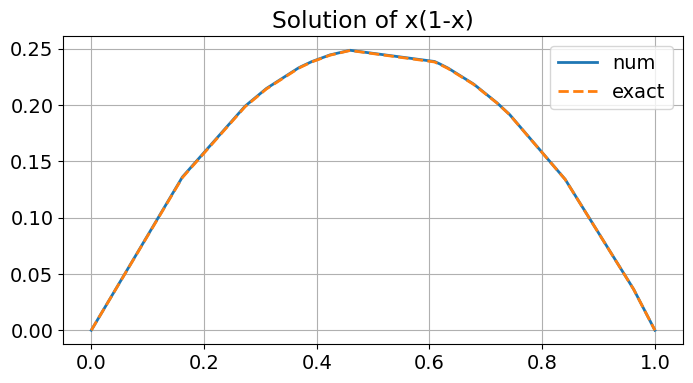

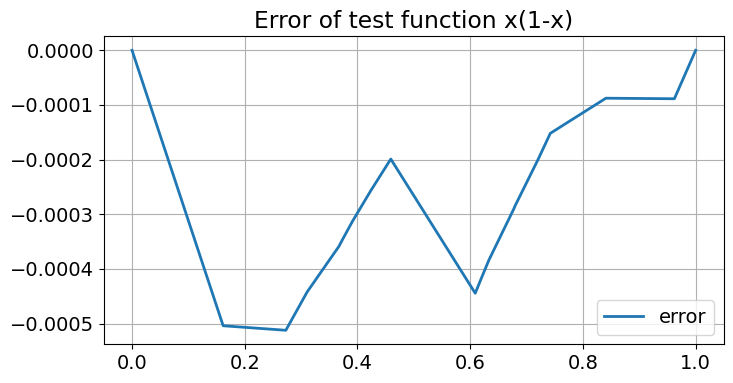

In [8]:
plt.figure()
plt.plot(Xk_1, U, label = 'num')
plt.plot(Xk_1, u(Xk_1), linestyle = '--', label = 'exact')
plt.legend()
plt.title('Solution of x(1-x)')
plt.show() 

plt.figure()
plt.plot(Xk_1, u(Xk_1)- U, label = 'error')
plt.legend()
plt.title('Error of test function x(1-x)')
plt.show() 

In [9]:
def L2(u, x):
    return integrate.trapezoid(u**2, x)

def H1(u, ux, x):
    return L2(u, x) + L2(ux, x)

#with fem_b equidistant nodes
def convergence_FEM(u_exact, f, a, b, c):
    P = 5
    M = 10
    # step sizes
    Hconv = np.zeros(P)
    # convergence in H1 and L2 norm
    H1conv = np.zeros(P)
    L2conv = np.zeros(P)
    
    x_ref = np.linspace(0, 1, M * 2**P*50)
    u_ref = u_exact(x_ref)

    
    for p in range(P):
        x = np.linspace(0, 1, M)
    
        U, A, Xk, rhs = FEM_b(f, a, b, c, M)
        U_inter = interpolate.interp1d(Xk, U)
        E = (u_ref - U_inter(x_ref))
        grad_E = np.gradient(E, x_ref)
        
        L2conv [p] = np.sqrt(L2(E, x_ref))
        H1conv[p] = np.sqrt(H1(E, grad_E, x_ref))
        Hconv[p] = 1/M
        M = 2*M-1
    L2orderMax = np.polyfit(np.log(Hconv),np.log(L2conv),1)[0]
    H1orderMax = np.polyfit(np.log(Hconv),np.log(H1conv),1)[0]
    return Hconv, L2conv, H1conv, L2orderMax, H1orderMax


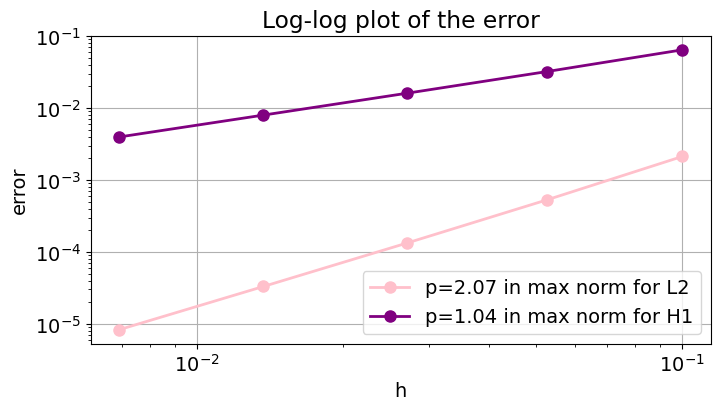

In [10]:
#Xk = np.linspace(0,1,n)
H, L2conv, H1conv, L2pM, H1pM = convergence_FEM(u, f, a, b, c)
    
plt.figure()
plt.loglog(H,L2conv,'o-', label='p={:.2f} in max norm for L2'.format(L2pM), color = 'pink')
plt.loglog(H,H1conv,'o-', label='p={:.2f} in max norm for H1'.format(H1pM), color = 'purple')
plt.grid('on')
plt.xlabel('h')
plt.ylabel('error')
plt.title('Log-log plot of the error')
plt.legend();



### e) 

In [11]:
def f1(x): 
    return x**(-2/5)

def f2(x): 
    #return 2/5*f1(x)
    return x**(-7/5)

In [12]:
#FEM for task e, for f1,f2 with more nodes near zero 
def FEM_mod_x_zero(f, a, b, c, n):
    
    #chatgpt 
    ''' A = np.zeros((n+1,n+1))
    rhs = np.zeros(n+1)
    r = 0.6 #[0,1]
    Xk = np.zeros(n+1)
  

    for i in range(1, n+1):
        Xk[i] = r**(n-i)
    '''
    A = np.zeros((n,n))
    rhs = np.zeros(n)
    r = 0.8 #[0,1]
    Xk = np.zeros(n-1)
    #Xk[-1] = 1
    
  

    for i in range(0, n-2):
        Xk[i+1] = r**(n-i)
         
    
        

    Xk = np.concatenate((Xk, [1]))
    H = Xk[1:]-Xk[:-1] # Element sizes from espen 
    phi = np.array([0,1])
    
    Ak = np.array([[a,-a],[-a,a]])
    Bk = np.array([[0, b/2],[-b/2, 0]])
    Ck = np.array([[c/3,c/6], [c/6, c/3]])
    
    #espen with modifications. 
    for k in range(0,n-1):
        x_max = Xk[k+1]
        x_min = Xk[k]
        x_interval = np.linspace(x_min, x_max, 10)       #x-values in the interval to do the integration
        for alpha in range(2):
            i = loc2glob(k,alpha)
            for beta in range(2):
                j = loc2glob(k,beta)
                A[i,j] += (Ak[alpha,beta]/H[k] + Bk[alpha,beta] + Ck[alpha,beta]*H[k])
            
           
        f_vals = f(x_interval[1:])
        f_vals = np.concatenate(([0], f_vals))
        phi0 = integrate.trapezoid(f_vals * (x_max - x_interval)/H[k], x_interval) #approx of integral of f(x)*phi0
        phi1 = integrate.trapezoid(f_vals * (x_interval - x_min)/H[k], x_interval)
        rhs[k] += phi0
        rhs[k+1] += phi1            
            
    #boudary (espen ):         
    A[0,:] = 0
    A[0,0] = 1
    A[-1,:] = 0
    A[-1,-1] = 1
    rhs[0] = 0
    rhs[-1] = 0
    
    
    U = np.linalg.solve(A, rhs)
    A = np.around(A, decimals= 2, out = None )  
    rhs = np.around(rhs, decimals= 2, out = None )

    return U, A, Xk, rhs

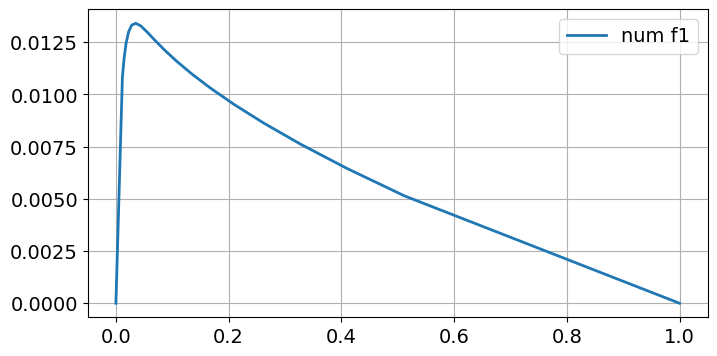

In [13]:
b1 = -100

U, A, Xk_1, rhs= FEM_mod_x_zero(f1, a, b1, c, n)

plt.figure()
plt.plot(Xk_1, U, label = 'num f1')
plt.legend()
plt.show() 

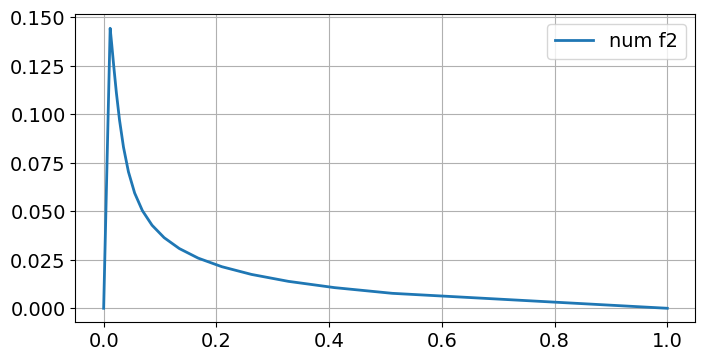

In [14]:
U, A, Xk_1, rhs = FEM_mod_x_zero(f2, a, b1, c, n)

plt.figure()
plt.plot(Xk_1, U, label = 'num f2')
plt.legend()
plt.show() 

# Task 2 f

In [15]:
#FEM for task f, equidistant nodes for exact solution
def FEM_equi(f, a, b, c, n):
    
    #chatgpt 
    A = np.zeros((n,n))
    rhs = np.zeros(n)
    Xk = np.linspace(0,1,n)
    
    H = Xk[1:]-Xk[:-1] # Element sizes from espen 
    phi = np.array([0,1])
    
    Ak = np.array([[a,-a],[-a,a]])
    Bk = np.array([[0, b/2],[-b/2, 0]])
    Ck = np.array([[c/3,c/6], [c/6, c/3]])
    
    #espen with modifications. 
    for k in range(0,n-1):
        x_max = Xk[k+1]
        x_min = Xk[k]
        x_interval = np.linspace(x_min, x_max, 10)       #x-values in the interval to do the integration
        for alpha in range(2):
            i = loc2glob(k,alpha)
            for beta in range(2):
                j = loc2glob(k,beta)
                A[i,j] += (Ak[alpha,beta]/H[k] + Bk[alpha,beta] + Ck[alpha,beta]*H[k])
            
           
        f_vals = f(x_interval[1:])
        f_vals = np.concatenate(([0], f_vals))
        phi0 = integrate.trapezoid(f_vals * (x_max - x_interval)/H[k], x_interval) # approx of integral of f(x)*phi0
        phi1 = integrate.trapezoid(f_vals * (x_interval - x_min)/H[k], x_interval)
        rhs[k] += phi0
        rhs[k+1] += phi1            
            
    #boudary (espen ):         
    A[0,:] = 0
    A[0,0] = 1
    A[-1,:] = 0
    A[-1,-1] = 1
    rhs[0] = 0
    rhs[-1] = 0
    
    
    U = np.linalg.solve(A, rhs)
    A = np.around(A, decimals= 2, out = None )  
    rhs = np.around(rhs, decimals= 2, out = None )

    return U, A, Xk, rhs

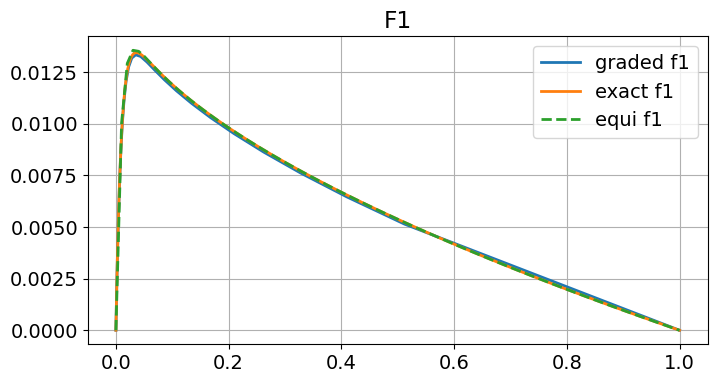

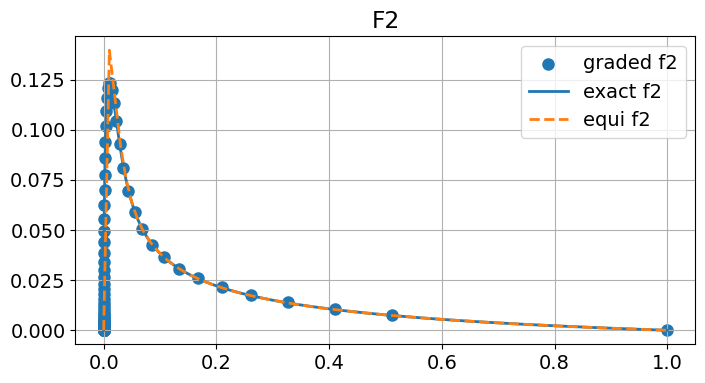

In [16]:
#exact f1 and f2 with n = 10000
n = 100
U1_exact, A, Xk1_exact, rhs = FEM_equi(f1, a, b1, c, 10000)
U2_exact, A, Xk2_exact, rhs = FEM_equi(f2, a, b1, c, 10000)

U1_eq, A, Xk1_eq, rhs = FEM_equi(f1, a, b1, c, n)
U2_eq, A, Xk2_eq, rhs = FEM_equi(f2, a, b1, c, n)

U1_graded, A, Xk1_graded, rhs = FEM_mod_x_zero(f1, a, b1, c, n)
U2_graded, A, Xk2_graded, rhs = FEM_mod_x_zero(f2, a, b1, c, n)


plt.figure()
plt.title("F1")

plt.plot(Xk1_graded, U1_graded, label = 'graded f1')
plt.plot(Xk1_exact, U1_exact, label = 'exact f1')
plt.plot(Xk1_eq, U1_eq, label = 'equi f1', linestyle = "--")
plt.legend()
plt.show() 


plt.figure()
plt.title("F2")

plt.scatter(Xk2_graded, U2_graded, label = 'graded f2')
plt.plot(Xk2_exact, U2_exact, label = 'exact f2')
plt.plot(Xk2_eq, U2_eq, label = 'equi f2', linestyle = "--")
plt.legend()
plt.show()



In [17]:
def convergence_FEM_graded(u_exact, f, a, b, c):
    P = 1
    M = 100
    # step sizes
    Hconv = np.zeros(P)
    # convergence in H1 and L2 norm
    H1conv = np.zeros(P)
    L2conv = np.zeros(P)
    
    u_ref, A, x_ref , rhs = FEM_equi(f, a, b, c, 10000) #exact 
    
    
    for p in range(P):
        x = np.linspace(0, 1, M)
    
        U, A, Xk, rhs = FEM_mod_x_zero(f, a, b, c, M)
        U_inter = interpolate.interp1d(Xk, U)
        E = (u_ref - U_inter(x_ref))
        grad_E = np.gradient(E, x_ref)
        
        L2conv [p] = np.sqrt(L2(E, x_ref))
        H1conv[p] = np.sqrt(H1(E, grad_E, x_ref))
        Hconv[p] = 1/M
        M = 2*M-1
    L2orderMax = np.polyfit(np.log(Hconv),np.log(L2conv),1)[0]
    H1orderMax = np.polyfit(np.log(Hconv),np.log(H1conv),1)[0]
    return Hconv, L2conv, H1conv, L2orderMax, H1orderMax

In [18]:
def convergence_FEM_equi(u_exact, f, a, b, c):
    P = 1
    M = 100
    # step sizes
    Hconv = np.zeros(P)
    # convergence in H1 and L2 norm
    H1conv = np.zeros(P)
    L2conv = np.zeros(P)
    
    #x_ref = np.linspace(0, 1, M * 2**P*50)
    u_ref, A, x_ref , rhs = FEM_equi(f, a, b, c, 10000) #exact 
    
    for p in range(P):
        x = np.linspace(0, 1, M)
    
        U, A, Xk, rhs = FEM_equi(f, a, b, c, M)# denne oppdateres med flere punkter
        U_inter = interpolate.interp1d(Xk, U) 
        E = (u_ref - U_inter(x_ref))
        grad_E = np.gradient(E, x_ref)
        
        L2conv [p] = np.sqrt(L2(E, x_ref))
        H1conv[p] = np.sqrt(H1(E, grad_E, x_ref))
        Hconv[p] = 1/M
        M = 2*M-1
    L2orderMax = np.polyfit(np.log(Hconv),np.log(L2conv),1)[0]
    H1orderMax = np.polyfit(np.log(Hconv),np.log(H1conv),1)[0]
    return Hconv, L2conv, H1conv, L2orderMax, H1orderMax

In [19]:
# convergence f1, equi vs exact 
H_f1_equi, L2conv_f1_equi, H1conv_f1_equi, L2_order_f1, H1_order_f1 = convergence_FEM_equi(U1_exact, f1, a, b1, c)
# convergence f1, graded vs exact 
H_f1_graded, L2conv_f1_graded, H1conv_f1_graded, L2_order_f1, H1_order_f1 = convergence_FEM_graded(U1_exact, f1, a, b1, c)

# convergence f2, equi vs exact 
H_f2_equi, L2conv_f2_equi, H1conv_f2_equi, L2_order_f2, H1_order_f2 = convergence_FEM_equi(U2_exact, f2, a, b1, c)
# convergence f2, graded vs exact 
H_f2_graded, L2conv_f2_graded, H1conv_f2_graded, L2_order_f2, H1_order_f2 = convergence_FEM_graded(U2_exact, f2, a, b1, c)


C:\Users\Emma Brændhagen\AppData\Local\Temp\ipykernel_10124\2874004244.py:25: RankWarning: Polyfit may be poorly conditioned
  L2orderMax = np.polyfit(np.log(Hconv),np.log(L2conv),1)[0]
C:\Users\Emma Brændhagen\AppData\Local\Temp\ipykernel_10124\2874004244.py:26: RankWarning: Polyfit may be poorly conditioned
  H1orderMax = np.polyfit(np.log(Hconv),np.log(H1conv),1)[0]
C:\Users\Emma Brændhagen\AppData\Local\Temp\ipykernel_10124\3254360332.py:25: RankWarning: Polyfit may be poorly conditioned
  L2orderMax = np.polyfit(np.log(Hconv),np.log(L2conv),1)[0]
C:\Users\Emma Brændhagen\AppData\Local\Temp\ipykernel_10124\3254360332.py:26: RankWarning: Polyfit may be poorly conditioned
  H1orderMax = np.polyfit(np.log(Hconv),np.log(H1conv),1)[0]
C:\Users\Emma Brændhagen\AppData\Local\Temp\ipykernel_10124\2874004244.py:25: RankWarning: Polyfit may be poorly conditioned
  L2orderMax = np.polyfit(np.log(Hconv),np.log(L2conv),1)[0]
C:\Users\Emma Brændhagen\AppData\Local\Temp\ipykernel_10124\2874004244

In [20]:
print('L2 equidistant: ', L2conv_f1_equi)
print('H1 equidistant: ', H1conv_f1_equi)

print('L2 graded: ', L2conv_f1_graded)
print('H1 graded: ', H1conv_f1_graded)

L2 equidistant:  [7.9351702e-05]
H1 equidistant:  [0.03210902]
L2 graded:  [9.56112816e-05]
H1 graded:  [0.00465375]


In [21]:
print('L2 equidistant: ', L2conv_f2_equi)
print('H1 equidistant: ', H1conv_f2_equi)

print('L2 graded: ', L2conv_f2_graded)
print('H1 graded: ', H1conv_f2_graded)

L2 equidistant:  [0.00379747]
H1 equidistant:  [1.87020716]
L2 graded:  [0.00059833]
H1 graded:  [0.09078401]


In [22]:
'''print('l2_f1_equi ', L2conv_f1_equi[4])
print('h1_f1_equi ', H1conv_f1_equi[4])



print('l2_f1_graded ', L2conv_f1_graded[4])
print('h1_f1_graded ', H1conv_f1_graded[0])
print('h1_f1_graded ', H1conv_f1_graded[4])

print('')
print('l2_f2_equi ', L2conv_f2_equi[4])
print('h1, f2, equi ', H1conv_f2_equi[4])


print('l2_f2_graded ', L2conv_f2_graded[4])
print('h1_f2_graded ',H1conv_f2_graded[0])


print('h1_f2_graded ', H1conv_f2_graded[4])'''

"print('l2_f1_equi ', L2conv_f1_equi[4])\nprint('h1_f1_equi ', H1conv_f1_equi[4])\n\n\n\nprint('l2_f1_graded ', L2conv_f1_graded[4])\nprint('h1_f1_graded ', H1conv_f1_graded[0])\nprint('h1_f1_graded ', H1conv_f1_graded[4])\n\nprint('')\nprint('l2_f2_equi ', L2conv_f2_equi[4])\nprint('h1, f2, equi ', H1conv_f2_equi[4])\n\n\nprint('l2_f2_graded ', L2conv_f2_graded[4])\nprint('h1_f2_graded ',H1conv_f2_graded[0])\n\n\nprint('h1_f2_graded ', H1conv_f2_graded[4])"

In [23]:

# convergence f2, equi vs exact 
H_f2_equi, L2conv_f2_equi, H1conv_f2_equi, L2_order_f2, H1_order_f2 = convergence_FEM_equi(U2_exact, f2, a, b, c)
# convergence f2, graded vs exact 
H_f2_graded, L2conv_f2_graded, H1conv_f2_graded, L2_order_f2, H1_order_f2 = convergence_FEM_graded(U2_exact, f2, a, b, c)


C:\Users\Emma Brændhagen\AppData\Local\Temp\ipykernel_10124\2874004244.py:25: RankWarning: Polyfit may be poorly conditioned
  L2orderMax = np.polyfit(np.log(Hconv),np.log(L2conv),1)[0]
C:\Users\Emma Brændhagen\AppData\Local\Temp\ipykernel_10124\2874004244.py:26: RankWarning: Polyfit may be poorly conditioned
  H1orderMax = np.polyfit(np.log(Hconv),np.log(H1conv),1)[0]
C:\Users\Emma Brændhagen\AppData\Local\Temp\ipykernel_10124\3254360332.py:25: RankWarning: Polyfit may be poorly conditioned
  L2orderMax = np.polyfit(np.log(Hconv),np.log(L2conv),1)[0]
C:\Users\Emma Brændhagen\AppData\Local\Temp\ipykernel_10124\3254360332.py:26: RankWarning: Polyfit may be poorly conditioned
  H1orderMax = np.polyfit(np.log(Hconv),np.log(H1conv),1)[0]


In [24]:
pd.options.display.float_format = '{:.5f}'.format
df = pd.DataFrame(data={'h': H_f1_equi, 'H1-error': H1conv_f1_equi ,'L2-error':L2conv_f1_equi}) 
df = df.rename_axis("Errors for f1 equi vs exact", axis='columns')
df

Errors for f1 equi vs exact,h,H1-error,L2-error
0,0.01000,0.03211,0.00008


In [25]:
pd.options.display.float_format = '{:.5f}'.format
df = pd.DataFrame(data={'h': H_f1_graded, 'H1-error': H1conv_f1_graded ,'L2-error':L2conv_f1_graded}) 
df = df.rename_axis("Errors for f1 graded vs exact", axis='columns')
df

Errors for f1 graded vs exact,h,H1-error,L2-error
0,0.01000,0.00465,0.00010


In [26]:
pd.options.display.float_format = '{:.5f}'.format
df = pd.DataFrame(data={'h': H_f2_equi, 'H1-error': H1conv_f2_equi ,'L2-error':L2conv_f2_equi}) 
df = df.rename_axis("Errors for f2 equi vs exact", axis='columns')
df

Errors for f2 equi vs exact,h,H1-error,L2-error
0,0.01000,1.62887,0.00786


In [27]:
pd.options.display.float_format = '{:.5f}'.format
df = pd.DataFrame(data={'h': H_f2_graded, 'H1-error': H1conv_f2_graded ,'L2-error':L2conv_f2_graded}) 
df = df.rename_axis("Errors for f2 graded vs exact", axis='columns')
df

Errors for f2 graded vs exact,h,H1-error,L2-error
0,0.01000,0.12488,0.00961
